# Implementation of ANN using Keras

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
#checking version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [3]:
os.getcwd()

'/content'

# Creating a simple classifier using keras on MNIST data

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [6]:
(X_train_full, y_train_full) , (X_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train_full[0].shape

(28, 28)

In [11]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid , X_train = X_train_full[:5000] / 255.,X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]

#scale the test set as well
X_test = X_test / 255.

In [12]:
# TRAIN - 55000
# TEST - 10000
# VAL - 5000

In [13]:
len(X_train_full[5000:])

55000

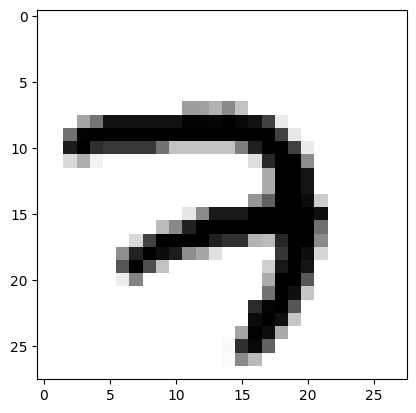

In [14]:
# Lets view some data

plt.imshow(X_train[0] , cmap = 'binary')
plt.show()

<Axes: >

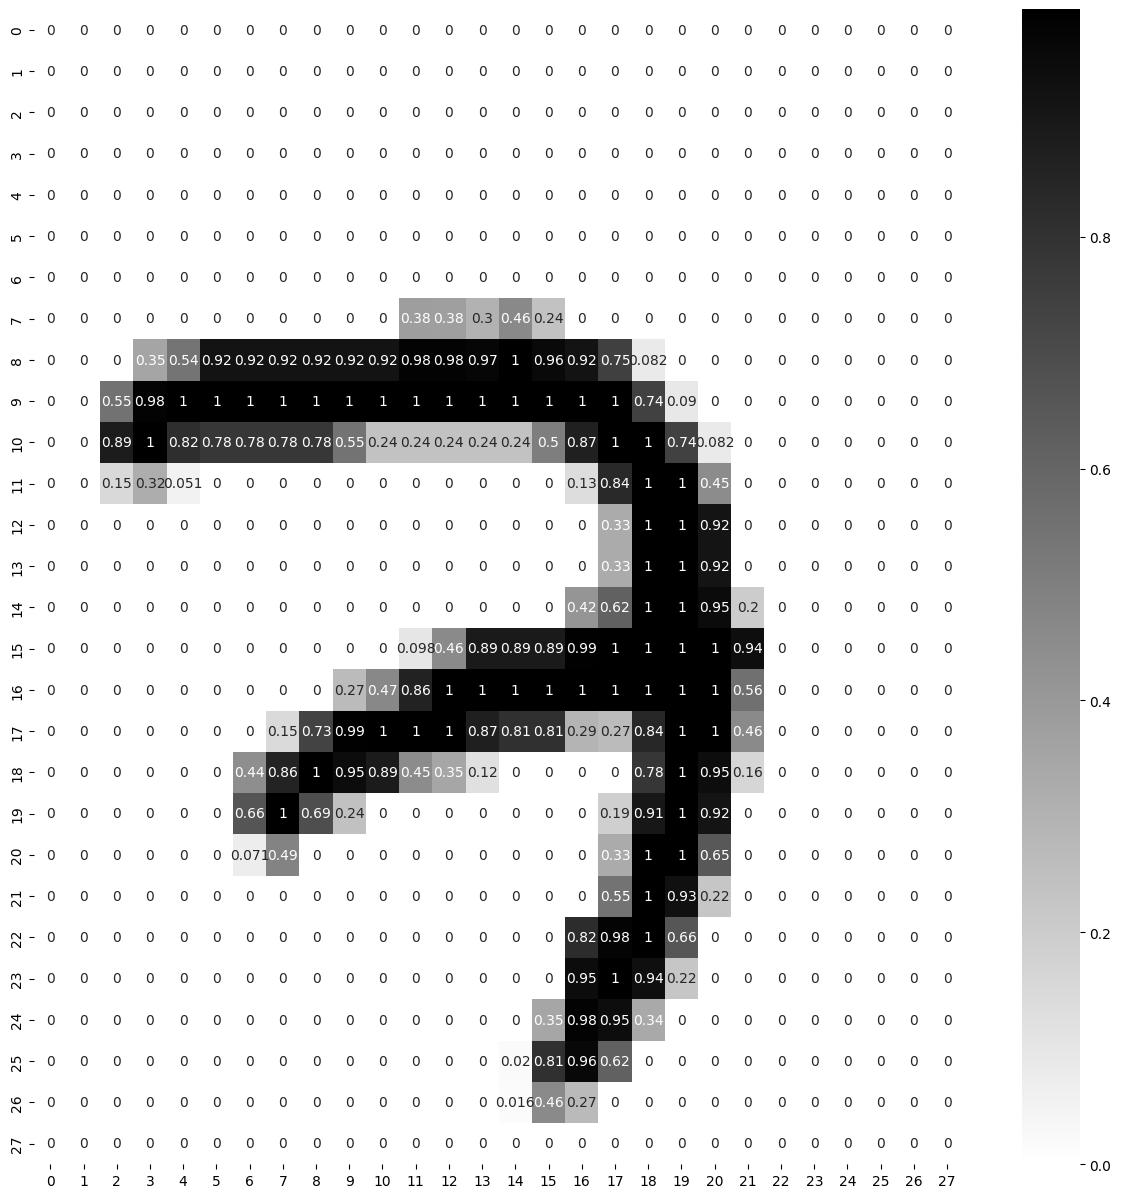

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0],annot = True , cmap = 'binary')

In [16]:
28*28

784

In [17]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = 'relu' , name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.Dense(10, activation = "softmax" , name = "outputLayer")]
model_clf = tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.layers

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 267,810
Trainable params: 267,210
Non-trainable params: 600
________________________________________________

In [20]:
# firstLayer * secondLayer + bias
784*300 + 300 , 300 * 100 + 100 , 100*10 + 10

(235500, 30100, 1010)

In [21]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [22]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [23]:
hidden1.get_weights()[0].shape

(784, 300)

In [24]:
hidden1.get_weights()[1].shape

(300,)

In [25]:
weights , biases = hidden1.get_weights()

In [26]:
weights.shape

(784, 300)

In [27]:
biases.shape

(300,)

In [28]:
print("shape\n", weights.shape , "\n")
weights

shape
 (784, 300) 



array([[-0.02563001, -0.04933798, -0.05223309, ..., -0.0155768 ,
         0.0233342 ,  0.02104244],
       [ 0.03715697,  0.06261447, -0.05005365, ..., -0.00770573,
         0.03864438,  0.05997103],
       [-0.04698387,  0.01800452, -0.00923973, ...,  0.06392063,
        -0.02495221, -0.0492936 ],
       ...,
       [ 0.043573  , -0.00734929, -0.00167742, ..., -0.01709216,
        -0.03317152, -0.00938911],
       [-0.02987745,  0.011354  , -0.05131215, ...,  0.02597347,
        -0.03061263,  0.07418539],
       [ 0.05795096, -0.00173712, -0.05538322, ...,  0.02509761,
        -0.01462521, -0.02005012]], dtype=float32)

In [29]:
print("shape\n", biases.shape , "\n")
biases

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [31]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model_clf.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 16s 8ms/step - loss: 0.3509 - accuracy: 0.8977 - val_loss: 0.1598 - val_accuracy: 0.9534
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1631 - accuracy: 0.9522 - val_loss: 0.1196 - val_accuracy: 0.9670
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1222 - accuracy: 0.9639 - val_loss: 0.1037 - val_accuracy: 0.9700
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0964 - accuracy: 0.9718 - val_loss: 0.0922 - val_accuracy: 0.9732
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0792 - accuracy: 0.9769 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0675 - accuracy: 0.9807 - val_loss: 0.0849 - val_accuracy: 0.9752
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0570 - accuracy: 0.9839 - val_loss: 0.0783 - val_accurac

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.350901,0.897673,0.159805,0.9534
1,0.163134,0.952200,0.119626,0.9670
2,0.122245,0.963909,0.103700,0.9700
3,0.096383,0.971836,0.092160,0.9732
4,0.079214,0.976927,0.086483,0.9748
5,0.067478,0.980709,0.084918,0.9752
6,0.056974,0.983927,0.078287,0.9764
7,0.050346,0.986018,0.078370,0.9758
8,0.042595,0.988436,0.077470,0.9774
9,0.036990,0.989873,0.077022,0.9782


<Axes: >

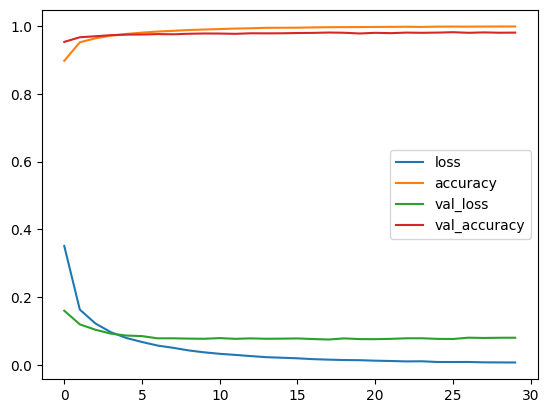

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9806


[0.07138480991125107, 0.9805999994277954]

# SAMPLE CHECK - TEST DATA

In [36]:
X_new  = X_test[:3]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [37]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

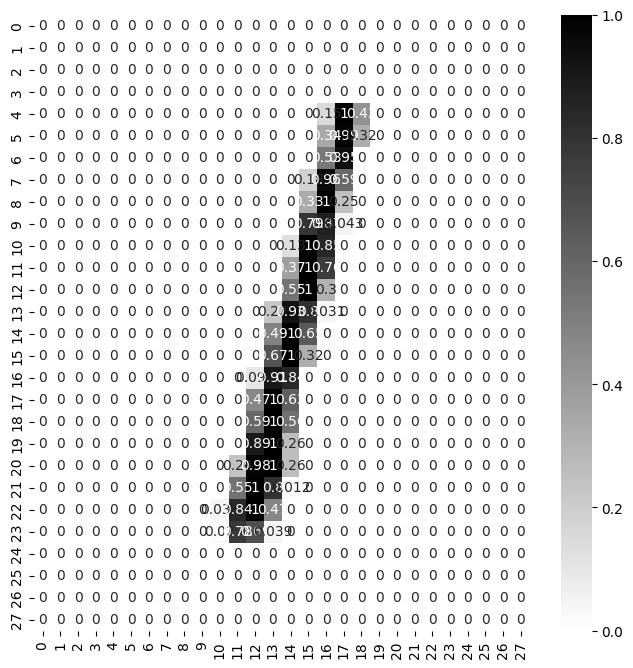

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2] , annot = True  ,cmap = 'binary')

In [39]:
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 124ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_prob

array([[2.49382026e-07, 1.94805082e-07, 7.18661852e-07, 1.29821841e-04,
        3.11008620e-07, 7.19195896e-07, 8.35494021e-08, 9.99863625e-01,
        4.89303034e-07, 3.76100365e-06],
       [8.00652167e-09, 1.52083558e-07, 9.99999642e-01, 7.04132859e-08,
        5.51970850e-13, 3.04984904e-09, 6.32530472e-08, 2.15316393e-12,
        3.54703533e-09, 8.27564822e-11],
       [7.13962223e-08, 9.99977112e-01, 1.28131444e-06, 2.00783688e-07,
        1.15693165e-05, 4.35003813e-07, 1.25619195e-07, 3.49613902e-06,
        5.72129284e-06, 3.99295175e-08]], dtype=float32)

In [41]:
y_pred = np.argmax(y_prob , axis = -1)

In [42]:
y_pred

array([7, 2, 1])

In [43]:
actual

array([7, 2, 1], dtype=uint8)

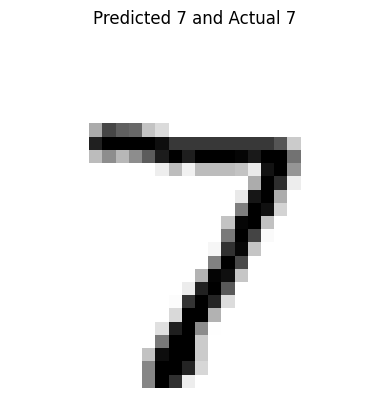

##################################################


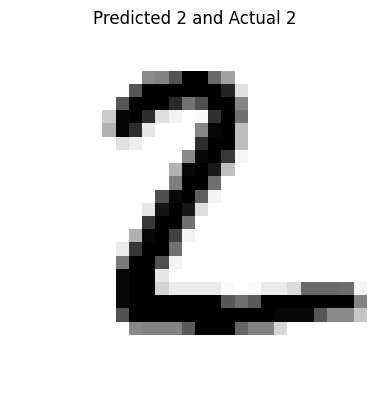

##################################################


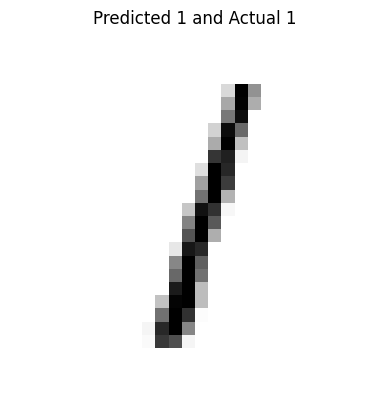

##################################################


In [44]:
# plot
for data , pred , actual_data in zip(X_new , y_pred , actual):
  plt.imshow(data,cmap='binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis('off')
  plt.show()
  print("#"*50)

In [45]:
#METHOD - 2 with regularization and dropout

In [46]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_regularizer= regularizers.l2(1e-4))) #lasso regularization
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_regularizer= regularizers.L1L2(l1=1e-5,l2=1e-4))) #elastic net regularization
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [48]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [49]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0429 - accuracy: 0.6726 - val_loss: 0.4167 - val_accuracy: 0.8974
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5513 - accuracy: 0.8402 - val_loss: 0.3168 - val_accuracy: 0.9176
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4537 - accuracy: 0.8720 - val_loss: 0.2730 - val_accuracy: 0.9270
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4013 - accuracy: 0.8879 - val_loss: 0.2423 - val_accuracy: 0.9360
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3679 - accuracy: 0.8983 - val_loss: 0.2253 - val_accuracy: 0.9430
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.9075 - val_loss: 0.2065 - val_accuracy: 0.9506
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.9135 - val_loss: 0.1919 - val_accuracy:

# weight initialization

## intializer with zeros --- does not allow the model to train

In [50]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_initializer=tf.keras.initializers.Zeros())) 
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_initializer=tf.keras.initializers.Zeros())) 
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu',kernel_initializer=tf.keras.initializers.Zeros()))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)               

In [52]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [53]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3017 - accuracy: 0.1110 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 2/5
1719/1719 [==============================] - 4s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 5/5
1719/1719 [==============================] - 4s 3ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126


In [54]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.301661,0.111036,2.301080,0.1126
1,2.301307,0.112345,2.300933,0.1126
2,2.301295,0.112345,2.300956,0.1126
3,2.301319,0.112345,2.300869,0.1126
4,2.301308,0.112345,2.300962,0.1126


# GLOROT NORMAL INITIALIZER - SAME AS XAVIER INITIALIZER

In [55]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal())) 
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal())) 
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)               

In [57]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [58]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2588 - accuracy: 0.5790 - val_loss: 0.4907 - val_accuracy: 0.8800
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6544 - accuracy: 0.7939 - val_loss: 0.3248 - val_accuracy: 0.9182
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5232 - accuracy: 0.8423 - val_loss: 0.2641 - val_accuracy: 0.9306
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4529 - accuracy: 0.8673 - val_loss: 0.2265 - val_accuracy: 0.9390
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4029 - accuracy: 0.8833 - val_loss: 0.2063 - val_accuracy: 0.9416


In [59]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.258766,0.578982,0.490705,0.8800
1,0.654366,0.793945,0.324765,0.9182
2,0.523157,0.842309,0.264111,0.9306
3,0.452931,0.867345,0.226520,0.9390
4,0.402905,0.883255,0.206301,0.9416


<Axes: >

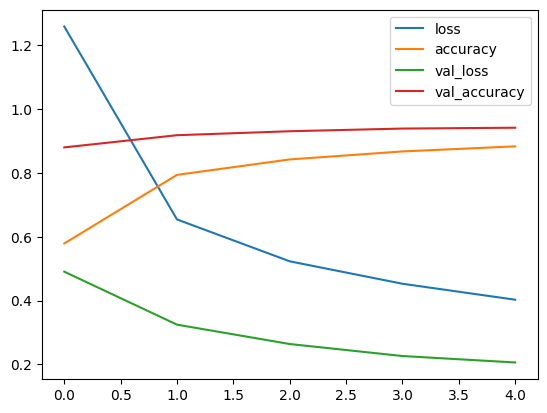

In [60]:
pd.DataFrame(history.history).plot()

# He weight initializer

In [61]:
from keras.api._v2.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense , Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#define the model 
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())) 
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())) 
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_10 (Dropout)        (None, 16)               

In [63]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [64]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 5s 2ms/step - loss: 1.2688 - accuracy: 0.5691 - val_loss: 0.4862 - val_accuracy: 0.8784
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6902 - accuracy: 0.7810 - val_loss: 0.3175 - val_accuracy: 0.9184
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5429 - accuracy: 0.8333 - val_loss: 0.2582 - val_accuracy: 0.9302
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4687 - accuracy: 0.8596 - val_loss: 0.2277 - val_accuracy: 0.9388
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4220 - accuracy: 0.8754 - val_loss: 0.2042 - val_accuracy: 0.9440


In [65]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.268781,0.569145,0.486193,0.8784
1,0.690209,0.780982,0.317501,0.9184
2,0.542863,0.833345,0.258195,0.9302
3,0.468724,0.859618,0.227706,0.9388
4,0.421952,0.875400,0.204194,0.9440


<Axes: >

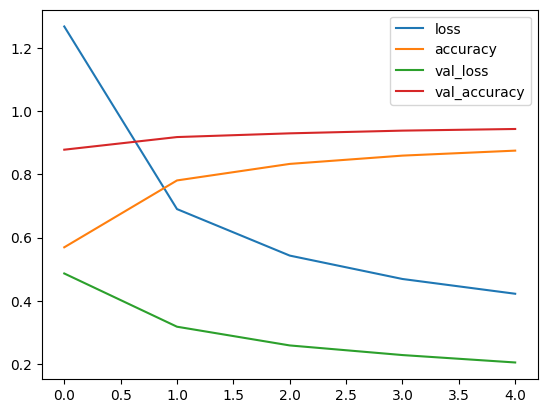

In [66]:
pd.DataFrame(history.history).plot()

# OPTIMIZERS

In [67]:
from keras.models import Sequential
from keras.layers import Dense , Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = [28,28] , name = 'inputLayer'))
model.add(Dense(units=64 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())) 
model.add(Dropout(0.2))
model.add(Dense(units=32 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())) 
model.add(Dropout(0.1))
model.add(Dense(units=16 , activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(Dropout(0.2))
model.add(Dense(units=10 , activation='softmax'))

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)               

In [69]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.9)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
                  optimizer=sgd,
                  metrics=METRICS)

In [70]:
# training

EPOCHS = 5
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS,
                        validation_data= VALIDATION_SET , batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6454 - accuracy: 0.7964 - val_loss: 0.2132 - val_accuracy: 0.9444
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.9010 - val_loss: 0.1583 - val_accuracy: 0.9564
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2896 - accuracy: 0.9195 - val_loss: 0.1432 - val_accuracy: 0.9626
Epoch 4/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2539 - accuracy: 0.9289 - val_loss: 0.1317 - val_accuracy: 0.9660
Epoch 5/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2398 - accuracy: 0.9338 - val_loss: 0.1275 - val_accuracy: 0.9660


In [71]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.645406,0.796364,0.213189,0.9444
1,0.341772,0.900964,0.158345,0.9564
2,0.289649,0.919455,0.143156,0.9626
3,0.253879,0.928891,0.131664,0.9660
4,0.239798,0.933782,0.127519,0.9660


<Axes: >

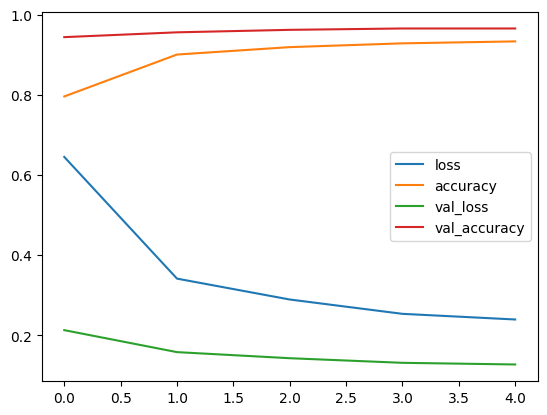

In [72]:
pd.DataFrame(history.history).plot()